In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df = pd.read_csv('data/LCA_latent_class_data.csv').drop(columns=["X"])

keep_classes = (df["class_assignment"].value_counts()/df["class_assignment"].count()).index[:6]
print(keep_classes)

# remove classes to keep only 6 classes
df = df[df["class_assignment"].isin(keep_classes)].reset_index().drop(columns=["index"])

start_index = df.columns.get_loc("congestive_heart_failure")
print(f"congestive_heart_failure's index is {start_index}")
# minus 1 for all Elixhauser index, since we manully add 1 for latent class analysis to avoid 0
df.iloc[:,start_index:-1] = df.iloc[:,start_index:-1] - 1

df["count_morbidity"] = df.iloc[:,start_index:-1].apply(lambda row: sum(row),axis=1)
df = df[~df["count_morbidity"].isna()]
df["count_morbidity"] = df["count_morbidity"].astype("str")
df

Index([1, 4, 3, 2, 8, 5], dtype='int64', name='class_assignment')
congestive_heart_failure's index is 6


,subject_id,admission_type,gender,age_bucket,max_age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,class_assignment,count_morbidity
0,9895,Non-elective,F,45-64,49,100006,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4.0
1,23018,Non-elective,F,65-84,74,100007,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.0
2,533,Non-elective,M,45-64,61,100009,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
3,55853,Elective,F,45-64,55,100010,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.0
4,87977,Non-elective,M,16-24,22,100011,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27544,94911,Non-elective,F,85-95,86,199992,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3.0
27545,20785,Non-elective,M,45-64,61,199993,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.0
27546,19412,Non-elective,M,16-24,24,199995,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,4.0
27547,27200,Non-elective,M,65-84,70,199998,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0


In [180]:
df[df["count_morbidity"].isna()]

,subject_id,admission_type,gender,age_bucket,max_age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,class_assignment,count_morbidity


In [181]:
for col in df.columns[start_index:-1]:
    print(col)
    print(df[col].value_counts())


congestive_heart_failure
congestive_heart_failure
0.0    21905
1.0     5527
Name: count, dtype: int64
cardiac_arrhythmias
cardiac_arrhythmias
0.0    18184
1.0     9248
Name: count, dtype: int64
valvular_disease
valvular_disease
0.0    24738
1.0     2694
Name: count, dtype: int64
pulmonary_circulation
pulmonary_circulation
0.0    26902
1.0      530
Name: count, dtype: int64
peripheral_vascular
peripheral_vascular
0.0    25422
1.0     2010
Name: count, dtype: int64
hypertension
hypertension
1    14383
0    13049
Name: count, dtype: int64
paralysis
paralysis
0.0    26580
1.0      852
Name: count, dtype: int64
other_neurological
other_neurological
0.0    24721
1.0     2711
Name: count, dtype: int64
chronic_pulmonary
chronic_pulmonary
0.0    22928
1.0     4504
Name: count, dtype: int64
diabetes_uncomplicated
diabetes_uncomplicated
0    21819
1     5613
Name: count, dtype: int64
diabetes_complicated
diabetes_complicated
0.0    27207
1.0      225
Name: count, dtype: int64
hypothyroidism
hypot

In [182]:
df["count_morbidity"].value_counts()

count_morbidity
2.0     6484
3.0     5626
1.0     5002
4.0     3885
5.0     2301
0.0     2247
6.0     1123
7.0      492
8.0      184
9.0       62
10.0      21
11.0       5
Name: count, dtype: int64

In [183]:
df["count_morbidity"] = df["count_morbidity"].replace(["8.0","9.0","10.0","11.0"],">8")
df

,subject_id,admission_type,gender,age_bucket,max_age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,class_assignment,count_morbidity
0,9895,Non-elective,F,45-64,49,100006,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4.0
1,23018,Non-elective,F,65-84,74,100007,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.0
2,533,Non-elective,M,45-64,61,100009,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
3,55853,Elective,F,45-64,55,100010,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.0
4,87977,Non-elective,M,16-24,22,100011,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27544,94911,Non-elective,F,85-95,86,199992,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3.0
27545,20785,Non-elective,M,45-64,61,199993,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.0
27546,19412,Non-elective,M,16-24,24,199995,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,4.0
27547,27200,Non-elective,M,65-84,70,199998,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0


In [184]:
df["count_morbidity"].value_counts()

count_morbidity
2.0    6484
3.0    5626
1.0    5002
4.0    3885
5.0    2301
0.0    2247
6.0    1123
7.0     492
>8      272
Name: count, dtype: int64

In [185]:
print(df.groupby(["class_assignment","count_morbidity"])["subject_id"].count()/df.groupby(["class_assignment"])["subject_id"].count())
# Calculate the percentage for each row within each group and assign it to a new column
df['percent'] = df.groupby(["class_assignment", "count_morbidity"])["subject_id"].transform('count') / \
                df.groupby("class_assignment")["subject_id"].transform('count') * 100
df

class_assignment  count_morbidity
1                 0.0                0.044930
                  1.0                0.265127
                  2.0                0.341077
                  3.0                0.217833
                  4.0                0.099179
                  5.0                0.025595
                  6.0                0.005703
                  7.0                0.000556
2                 0.0                0.323860
                  1.0                0.308503
                  2.0                0.217052
                  3.0                0.107724
                  4.0                0.033005
                  5.0                0.008710
                  6.0                0.001146
3                 0.0                0.115899
                  1.0                0.299388
                  2.0                0.308006
                  3.0                0.182127
                  4.0                0.067589
                  5.0                0.021774


,subject_id,admission_type,gender,age_bucket,max_age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,class_assignment,count_morbidity,percent
0,9895,Non-elective,F,45-64,49,100006,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4.0,6.758902
1,23018,Non-elective,F,65-84,74,100007,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.0,11.370882
2,533,Non-elective,M,45-64,61,100009,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0,2.559466
3,55853,Elective,F,45-64,55,100010,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.0,30.800635
4,87977,Non-elective,M,16-24,22,100011,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0,30.850332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27544,94911,Non-elective,F,85-95,86,199992,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3.0,25.929862
27545,20785,Non-elective,M,45-64,61,199993,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.0,25.059274
27546,19412,Non-elective,M,16-24,24,199995,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,4.0,3.300481
27547,27200,Non-elective,M,65-84,70,199998,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,21.783280


In [186]:
df["class_assignment"] = df["class_assignment"].replace(8,6)
df = df.sort_values(by="count_morbidity", ascending=True)
df

,subject_id,admission_type,gender,age_bucket,max_age_at_admission,hadm_id,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,class_assignment,count_morbidity,percent
16110,65890,Elective,M,25-44,45,158637,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,32.385973
20029,25677,Non-elective,M,16-24,20,173060,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,32.385973
10714,17492,Elective,M,45-64,59,138589,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,4.492975
25627,81103,Elective,F,45-64,64,193103,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,11.589930
10708,22138,Non-elective,F,45-64,46,138571,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,11.589930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,44123,Elective,F,85-95,86,116395,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,>8,3.957687
15720,77947,Non-elective,M,45-64,64,157138,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6,>8,1.105845
1997,15626,Non-elective,F,65-84,66,107083,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4,>8,3.957687
8150,46197,Non-elective,M,65-84,75,129212,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4,>8,3.957687


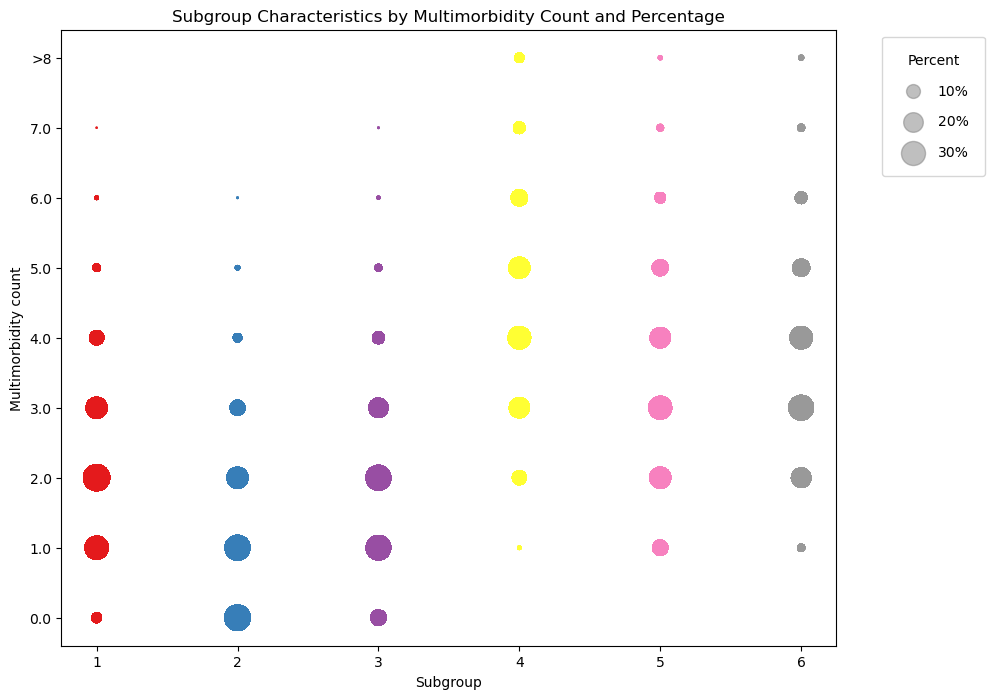

In [192]:

# Create a bubble plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=df['class_assignment'],
    y=df['count_morbidity'],
    s=df['percent']*10,  # Scale bubble size (adjust multiplier as needed)
    alpha=0.6,
    c=df['class_assignment'],  # Color by subgroup
    cmap='Set1'  # Choose a color map
)

# Customize the plot
plt.xlabel("Subgroup")
plt.ylabel("Multimorbidity count")
plt.title("Subgroup Characteristics by Multimorbidity Count and Percentage")

# Legend for bubble sizes
for size in [10, 20, 30]:  # Adjust sizes to match your `percent` range
    plt.scatter([], [], s=size * 10, color='gray', alpha=0.5, label=str(size) + '%')
plt.legend(
    title="Percent", 
    loc="upper left", 
    bbox_to_anchor=(1.05, 1),  
    scatterpoints=1, 
    frameon=True,
    labelspacing=1.2,  
    borderpad=1.2      
)

plt.show()

/tmp/ipykernel_1717/3181855928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


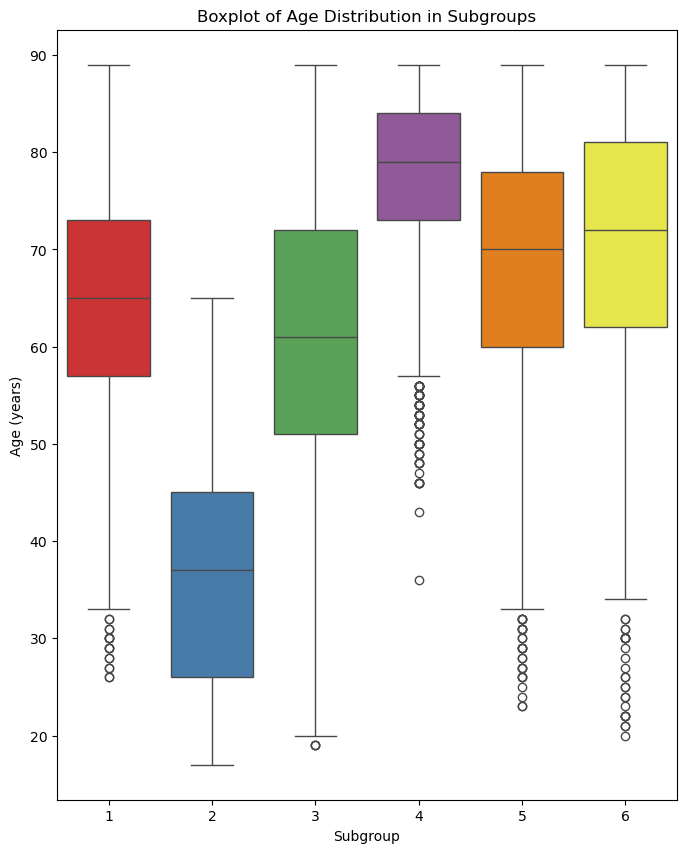

In [195]:
# Sample code to create a box plot
plt.figure(figsize=(8, 10))
sns.boxplot(
    data=df,
    x="class_assignment",  # X-axis representing the subgroups
    y="max_age_at_admission", # Y-axis representing age
    palette="Set1"         # Color palette similar to the one in the plot
)

# Customize the plot
plt.xlabel("Subgroup")
plt.ylabel("Age (years)")
plt.title("Boxplot of Age Distribution in Subgroups")

plt.show()